In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import skew
%matplotlib inline

In [2]:
# set facecolor to white for showing tick labels in dark theme mode
# context = plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'})
mpl.rcParams['figure.facecolor'] = 'w'

# Basic Exploration of Data

In [3]:
train = pd.read_csv('train.csv')
train.head()

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price
0,e3mMIMR3JJqCaXz1,8,21,18674,4,3,2,6271,2,NaN,...,58,1,157,1,2483,1,6011,1,34.469803,6.476038e+05
1,LgwzgklNvy4QCtq5,8,7,18800,5,1,2,7885,2,NaN,...,28,1,115,1,15872,1,32221,1,40.073573,3.321452e+06
2,ucIR2NLLsC3T650L,8,7,19289,4,1,2,6028,2,NaN,...,78,1,212,1,15760,1,32228,1,54.462081,9.570885e+06
3,jre1pJhcQj91Kdky,8,21,20385,24,0,2,18325,0,NaN,...,20,1,125,1,2568,1,7271,1,99.628966,1.421501e+07
4,rQpYpY9nRG7X5mmr,1,21,20657,2,4,2,6880,2,NaN,...,18,1,47,1,2587,1,7442,1,124.131236,7.627120e+05


In [4]:
s = ""
for col in train.columns:
    s += col + ' , '
s

'building_id , building_material , city , txn_dt , total_floor , building_type , building_use , building_complete_dt , parking_way , parking_area , parking_price , txn_floor , land_area , building_area , town , lat , lon , village_income_median , town_population , town_area , town_population_density , doc_rate , master_rate , bachelor_rate , jobschool_rate , highschool_rate , junior_rate , elementary_rate , born_rate , death_rate , marriage_rate , divorce_rate , village , N_50 , N_500 , N_1000 , N_5000 , N_10000 , I_10 , I_50 , I_index_50 , I_100 , I_250 , I_500 , I_index_500 , I_1000 , I_index_1000 , I_5000 , I_index_5000 , I_10000 , I_index_10000 , I_MIN , II_10 , II_50 , II_index_50 , II_100 , II_250 , II_500 , II_index_500 , II_1000 , II_index_1000 , II_5000 , II_index_5000 , II_10000 , II_index_10000 , II_MIN , III_10 , III_50 , III_index_50 , III_100 , III_250 , III_500 , III_index_500 , III_1000 , III_index_1000 , III_5000 , III_index_5000 , III_10000 , III_index_10000 , III_MIN

In [5]:
test = pd.read_csv('test.csv')
test.head()

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN
0,X5gsdTWGS3W7JJQB,1,13,18634,2,4,2,1857,2,NaN,...,7,21,1,129,1,3991,1,8409,1,105.462231
1,BTshNOJyKHnT2YIT,8,7,20199,10,3,2,16011,2,NaN,...,18,44,1,67,1,1950,1,10725,1,100.819809
2,dhdymr0lV8N5kZOT,8,12,19769,4,4,10,18294,2,NaN,...,0,3,1,35,1,3707,1,19459,1,259.800543
3,VEwyGGMcD56w5BOc,10,7,20479,19,2,0,17837,2,NaN,...,16,60,1,144,1,6487,1,29400,1,22.941906
4,wmUeMoJZfsqaSX9b,8,3,18164,13,0,2,13272,2,NaN,...,4,18,1,76,1,1346,1,3280,1,181.213095


# Merge feature data of both training and testing data set

In [6]:
all_data = pd.concat((train.loc[:,'building_material':'village'],
                      test.loc[:,'building_material':'village']))

In [7]:
all_data.head()

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,...,bachelor_rate,jobschool_rate,highschool_rate,junior_rate,elementary_rate,born_rate,death_rate,marriage_rate,divorce_rate,village
0,8,21,18674,4,3,2,6271,2,NaN,NaN,...,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3132
1,8,7,18800,5,1,2,7885,2,NaN,NaN,...,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,921
2,8,7,19289,4,1,2,6028,2,NaN,NaN,...,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1544
3,8,21,20385,24,0,2,18325,0,NaN,81138.889762,...,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3350
4,1,21,20657,2,4,2,6880,2,NaN,NaN,...,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,63


# Check the assumption of data: the one with parking_area value must have the value of parking_price

In [8]:
df1 = all_data[all_data['parking_area'].notnull()]
df1[df1['parking_price'].isnull()]

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,...,bachelor_rate,jobschool_rate,highschool_rate,junior_rate,elementary_rate,born_rate,death_rate,marriage_rate,divorce_rate,village


### * The item that has parking_area also has parking price in the current data set *

# Explore building_material

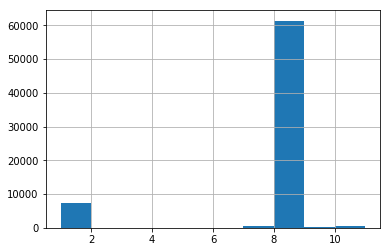

In [9]:
df2 = all_data['building_material']
df2.hist()

In [10]:
# bm_dict = {}
# for i in range(df2.min(),df2.max() + 1):
#     bm_dict[i]=0
# for itm in df2.values:
#     bm_dict[itm] += 1
# bm_dict

## type 2 and 6 never show in this dataset

# Correlation Analysis

In [11]:
data = train.copy()
data['parking_area'].fillna(0, inplace=True)
data['parking_price'].fillna(0, inplace=True)
features = data.loc[:,'building_material':'XIV_MIN'].columns.tolist()
target = 'total_price'

In [12]:
from scipy.stats import pearsonr

correlations = {}
for f in features:
    data_temp = data[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [13]:
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index][:10]

,Value
building_area vs total_price,0.459167
land_area vs total_price,0.313409
parking_price vs total_price,0.251772
master_rate vs total_price,0.168603
bachelor_rate vs total_price,0.168585
doc_rate vs total_price,0.165599
highschool_rate vs total_price,-0.164966
XIII_5000 vs total_price,0.161861
jobschool_rate vs total_price,0.150532
junior_rate vs total_price,-0.147248


# Explore relation between total_floor and total_price

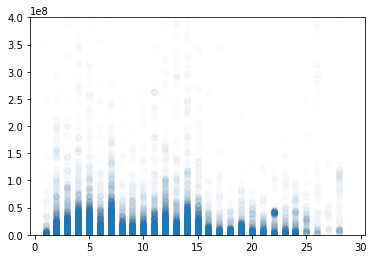

In [14]:
df3 = train[['total_floor','total_price']]
plt.ylim(0, 4e8)
plt.scatter(x=df3['total_floor'],y=df3['total_price'],alpha = 0.01)

In [15]:
data_correlations.loc['total_floor vs total_price']

Value    0.044604
Name: total_floor vs total_price, dtype: float64

In [16]:
data_correlations.loc['txn_floor vs total_price']

Value   NaN
Name: txn_floor vs total_price, dtype: float64

## maybe should treat total_floor as category

# Find all columns that have missing values

In [17]:
all_data.columns[all_data.isna().any()]

Index(['parking_area', 'parking_price', 'txn_floor', 'village_income_median'], dtype='object')

In [18]:
all_data.shape

(70000, 32)

# Fill missing values for txn_floor with mode value

In [19]:
all_data['txn_floor'].mode()

0    4.0
dtype: float64

In [20]:
all_data['txn_floor'].fillna(all_data['txn_floor'].mode()[0], inplace=True)

# Explore village_income_median

In [21]:
# all_data[all_data['village_income_median'].isnull()][['village']]

In [22]:
# all_data[all_data['village'] == 1131][['town']]

In [23]:
# all_data[all_data['town'] == 84][['village_income_median']]

In [24]:
std = all_data.groupby('town', as_index=False)['village_income_median'].std().values
mean = all_data.groupby('town', as_index=False)['village_income_median'].mean().values
std_percent = std[:,1]/mean[:,1]
std_percent[std_percent > 0.2]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


array([0.22064696, 0.2016842 , 0.21100746, 0.20676009, 0.30560652,
       0.20629473])

### -->Conclusion: ignore column 'village_income_median'

# Explore the distribution of total_price

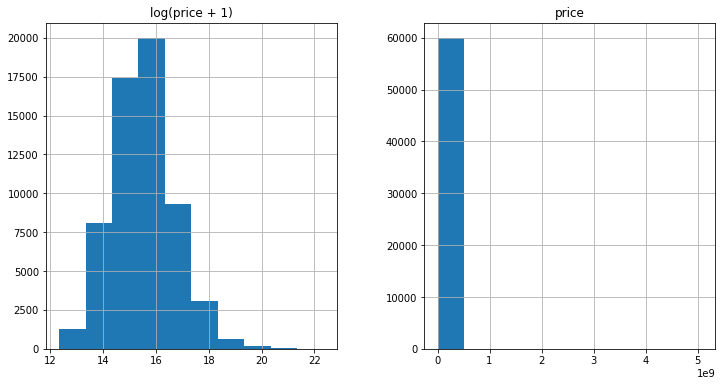

In [25]:
mpl.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["total_price"], "log(price + 1)":np.log1p(train["total_price"])})
axes = prices.hist()

# Explore the distribution of building_area

In [26]:
price_lim = 1e9
area_lim = 1000

(0, 1000000000.0)

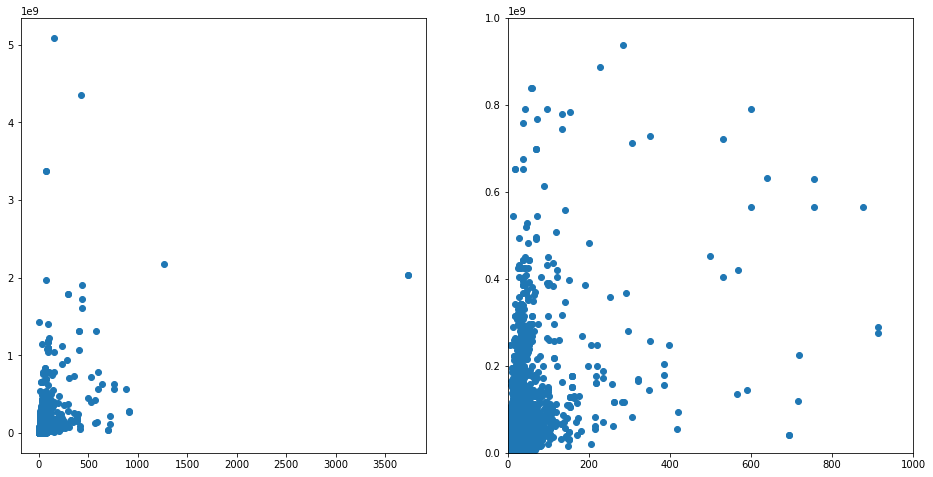

In [27]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121)
ax.scatter(train['building_area'],train['total_price'])



ax1 = fig.add_subplot(122)
ax1.scatter(train['building_area'],train['total_price'])

ax1.set_xlim([0,area_lim])
ax1.set_ylim([0,price_lim])

In [28]:
train.loc[(train['total_price'] < price_lim) & (train['building_area'] < area_lim)].shape[0],train.shape[0]

(59963, 60000)

In [29]:
p_train = train.loc[(train['total_price'] < price_lim) & (train['building_area'] < area_lim)]

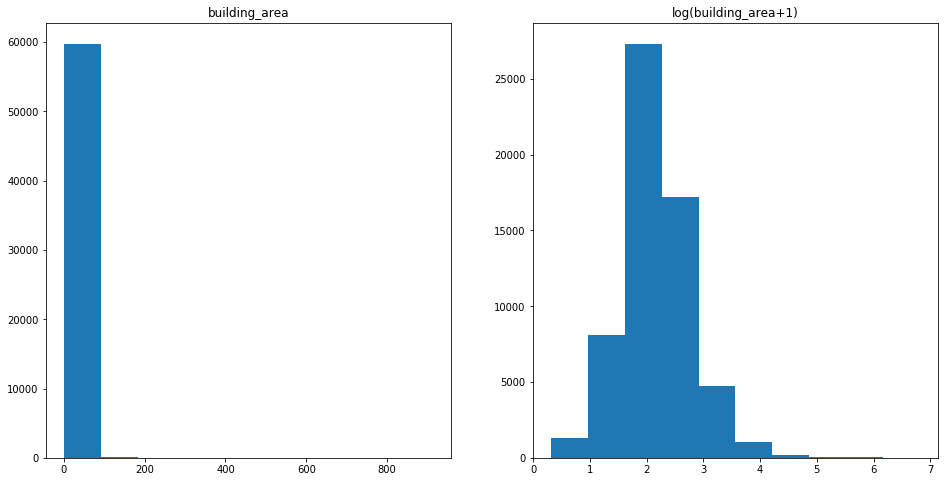

In [30]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
ax1.hist(p_train["building_area"])
ax1.title.set_text('building_area')

ax2 = fig.add_subplot(122)
ax2.hist(np.log1p(p_train["building_area"]))
ax2.title.set_text('log(building_area+1)')


# Show skewness of numeric features

In [31]:
#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
# skewed_feats = skewed_feats.index
skewed_feats

total_floor                 1.104637
building_use                3.581729
parking_area               40.411997
parking_price               3.761163
txn_floor                   1.808235
land_area                  42.577276
building_area              82.105684
village_income_median       2.804583
town_area                   1.987026
town_population_density     0.767788
doc_rate                    1.494323
master_rate                 1.434175
bachelor_rate               1.220866
elementary_rate             0.850178
death_rate                  1.547331
dtype: float64

In [32]:
all_data[all_data['parking_area'] > 0][['parking_area']][:10]

,parking_area
53,7.180619
55,3.101806
57,7.180619
104,20.904384
124,4.394560
130,7.911500
153,4.394560
164,7.180619
189,5.758023
196,4.394560


In [33]:
# percentage of zeros in a feature
all_data['parking_area'].fillna(0, inplace=True)
print('parking_area is 0: {:02.0f}%'.format(all_data[all_data['parking_area'] == 0].shape[0] / all_data.shape[0] * 100.0))

parking_area is 0: 95%


In [34]:
# x_lim = 20
# y_lim = 4e8

In [35]:
# fig = plt.figure(figsize=(16,8))
# ax = fig.add_subplot(121)
# ax.scatter(train['parking_area'],train['total_price'])

# ax1 = fig.add_subplot(122)
# ax1.scatter(train['parking_area'],train['total_price'])

# ax1.set_xlim([0,x_lim])
# ax1.set_ylim([0,y_lim])

In [36]:
# all_data['parking_area'].fillna(0, inplace=True)
# all_data['parking_price'].fillna(0, inplace=True)

In [37]:
# all_data.loc[(all_data['parking_area'] < x_lim)].shape[0],all_data.shape[0]

In [38]:
# p_all_data = all_data.loc[(all_data['parking_area'] < x_lim)]

In [39]:
# fig = plt.figure(figsize=(16,8))
# ax1 = fig.add_subplot(121)
# ax1.hist(p_all_data["parking_area"])

# ax2 = fig.add_subplot(122)
# ax2.hist(np.log1p(p_all_data["parking_area"]))

## dominated by zeros. drop the column 'parking_area'

In [40]:
# train.head()

# Explore the distribution of 'land_area'

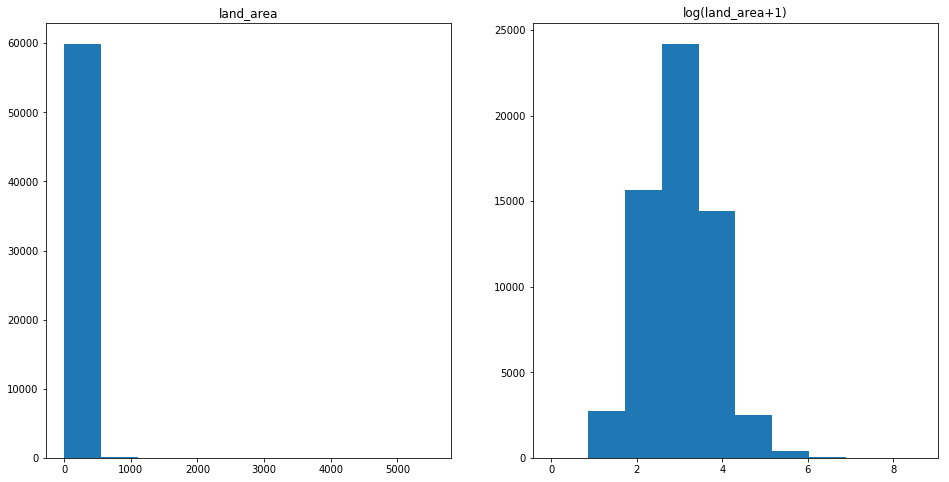

In [41]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
ax1.hist(train["land_area"])
ax1.title.set_text('land_area')

ax2 = fig.add_subplot(122)
ax2.hist(np.log1p(train["land_area"]))
ax2.title.set_text('log(land_area+1)')